<a href="https://colab.research.google.com/github/BzTrung/AI_Training/blob/main/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install keras

# **Number Recognition**

In [111]:
from keras.datasets import mnist
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense , Activation, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model

In [102]:
(x_train,y_train),(x_test,y_test)= mnist.load_data()
x=x_test

11501568/11490434 [==============================] - 0s 0us/step


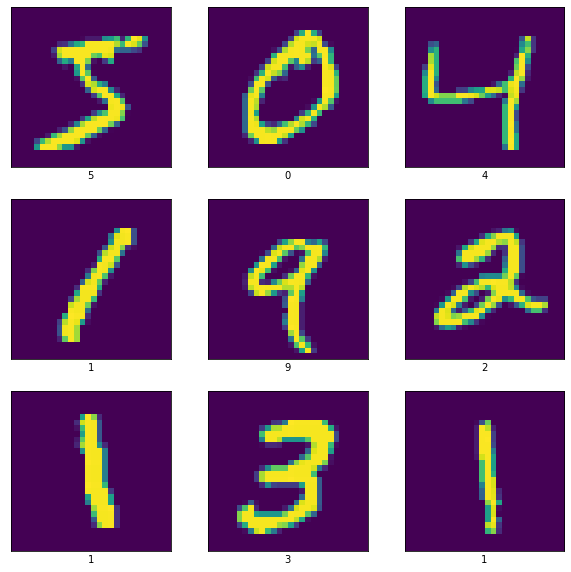

In [103]:
plt.figure(figsize=(10,10))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x_train[i])
  plt.xlabel(y_train[i])
plt.show()


In [104]:
x_train=x_train.reshape(60000,784)
x_test=x_test.reshape(10000,784)
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')
x_train/=255
x_test/=255

In [105]:
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)

In [106]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 784)
(10000, 784)
(60000, 10)
(10000, 10)


In [107]:
model = Sequential()
model.add(Dense(512,activation='relu',input_shape=(784,)))
model.add(Dense(512,activation='relu'))
model.add(Dense(10,activation='Softmax'))
model.summary()
from keras.backend import categorical_crossentropy
from tensorflow.keras.optimizers import RMSprop
model.compile(loss='categorical_crossentropy',optimizer=RMSprop(), metrics=['accuracy'])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 512)               401920    
                                                                 
 dense_10 (Dense)            (None, 512)               262656    
                                                                 
 dense_11 (Dense)            (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [109]:
history = model.fit(x_train,y_train,batch_size=128,epochs=10,verbose=1,validation_data=(x_test,y_test))

Epoch 1/10
469/469 [==============================] - 19s 40ms/step - loss: 0.0623 - accuracy: 0.9804 - val_loss: 0.1020 - val_accuracy: 0.9712
Epoch 2/10
469/469 [==============================] - 12s 25ms/step - loss: 0.0437 - accuracy: 0.9868 - val_loss: 0.0785 - val_accuracy: 0.9772
Epoch 3/10
469/469 [==============================] - 9s 20ms/step - loss: 0.0327 - accuracy: 0.9899 - val_loss: 0.0806 - val_accuracy: 0.9811
Epoch 4/10
469/469 [==============================] - 8s 18ms/step - loss: 0.0233 - accuracy: 0.9931 - val_loss: 0.0857 - val_accuracy: 0.9811
Epoch 5/10
469/469 [==============================] - 9s 18ms/step - loss: 0.0219 - accuracy: 0.9934 - val_loss: 0.1020 - val_accuracy: 0.9808
Epoch 6/10
469/469 [==============================] - 9s 19ms/step - loss: 0.0155 - accuracy: 0.9952 - val_loss: 0.1045 - val_accuracy: 0.9792
Epoch 7/10
469/469 [==============================] - 8s 18ms/step - loss: 0.0124 - accuracy: 0.9960 - val_loss: 0.1237 - val_accuracy: 0.97

In [113]:
model.save("/content/drive/MyDrive/Colab Notebooks/final_train/final_mnist.h5")
model=load_model("/content/drive/MyDrive/Colab Notebooks/final_train/final_mnist.h5")

In [114]:
score=model.evaluate(x_test,y_test,verbose=1)
print("test loss = ",score[0])
print("test accuracy = ",score[1])

313/313 [==============================] - 1s 4ms/step - loss: 0.1373 - accuracy: 0.9809
test loss =  0.13725589215755463
test accuracy =  0.98089998960495


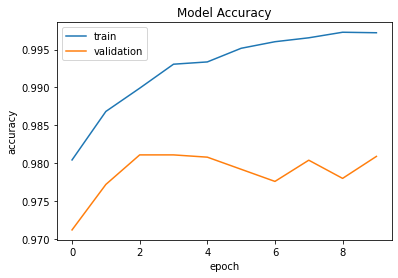

In [115]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','validation'],loc='upper left')

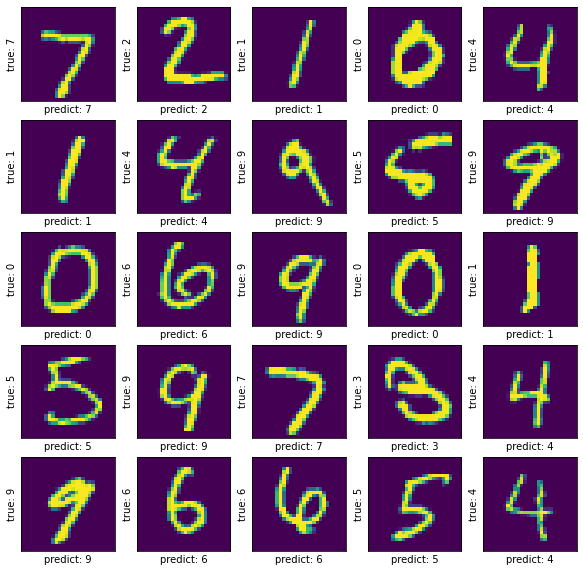

In [116]:
y_pred = model.predict(x_test)
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x[i])
  plt.xlabel("predict: "+str(np.argmax(y_pred[i])))
  plt.ylabel("true: "+str(np.argmax(y_test[i])))
plt.show()

# **Fashion MNIST**

In [117]:
from keras.datasets import fashion_mnist
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from keras.models import Sequential,load_model
from keras.layers import Dense , Activation, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import load_img,img_to_array
from tensorflow.keras.optimizers import SGD,Adam


In [118]:
(x_train,y_train),(x_test,y_test)= fashion_mnist.load_data()
x=x_test

4431872/4422102 [==============================] - 0s 0us/step


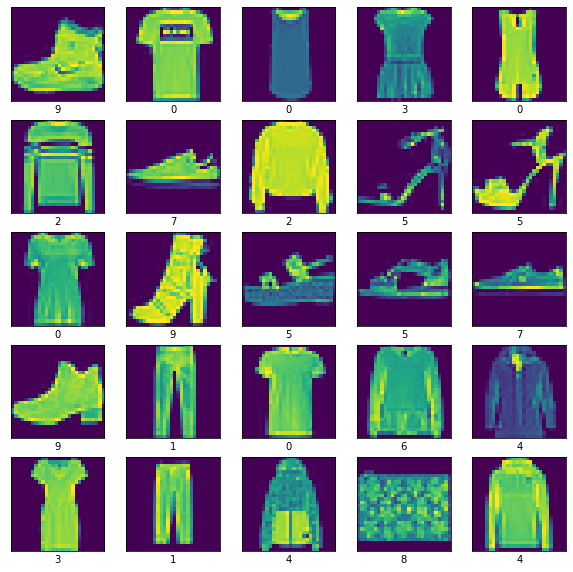

In [119]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x_train[i])
  plt.xlabel(y_train[i])
plt.show()


In [120]:
x_train=x_train.reshape(60000,784)
x_test=x_test.reshape(10000,784)
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')
x_train/=255
x_test/=255
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)

In [121]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 784)
(10000, 784)
(60000, 10)
(10000, 10)


In [124]:
model = Sequential()
model.add(Dense(512,activation='relu',input_shape=(784,)))
model.add(Dense(784,activation='relu'))
model.add(Dense(10,activation='Softmax'))
model.summary()
from keras.backend import categorical_crossentropy
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 512)               401920    
                                                                 
 dense_16 (Dense)            (None, 784)               402192    
                                                                 
 dense_17 (Dense)            (None, 10)                7850      
                                                                 
Total params: 811,962
Trainable params: 811,962
Non-trainable params: 0
_________________________________________________________________


In [125]:
history = model.fit(x_train,y_train,batch_size=128,epochs=20,verbose=1,validation_data=(x_test,y_test))

Epoch 1/20
469/469 [==============================] - 9s 19ms/step - loss: 0.4721 - accuracy: 0.8314 - val_loss: 0.3921 - val_accuracy: 0.8583
Epoch 2/20
469/469 [==============================] - 9s 19ms/step - loss: 0.3493 - accuracy: 0.8727 - val_loss: 0.3643 - val_accuracy: 0.8660
Epoch 3/20
469/469 [==============================] - 9s 19ms/step - loss: 0.3161 - accuracy: 0.8839 - val_loss: 0.3526 - val_accuracy: 0.8692
Epoch 4/20
469/469 [==============================] - 9s 19ms/step - loss: 0.2875 - accuracy: 0.8935 - val_loss: 0.3583 - val_accuracy: 0.8681
Epoch 5/20
469/469 [==============================] - 9s 19ms/step - loss: 0.2693 - accuracy: 0.9002 - val_loss: 0.3759 - val_accuracy: 0.8601
Epoch 6/20
469/469 [==============================] - 9s 19ms/step - loss: 0.2562 - accuracy: 0.9032 - val_loss: 0.3337 - val_accuracy: 0.8808
Epoch 7/20
469/469 [==============================] - 9s 19ms/step - loss: 0.2425 - accuracy: 0.9084 - val_loss: 0.3367 - val_accuracy: 0.8801

In [ ]:
model.save("/content/drive/MyDrive/Colab Notebooks/final_train/final_fashion.h5")
model = load_model("/content/drive/MyDrive/Colab Notebooks/final_train/final_fashion.h5")

In [126]:
score=model.evaluate(x_test,y_test,verbose=1)
print("test loss = ",score[0])
print("test accuracy = ",score[1])

313/313 [==============================] - 1s 4ms/step - loss: 0.3506 - accuracy: 0.8968
test loss =  0.3506481945514679
test accuracy =  0.8967999815940857


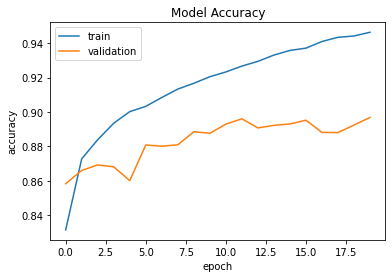

In [127]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','validation'],loc='upper left')

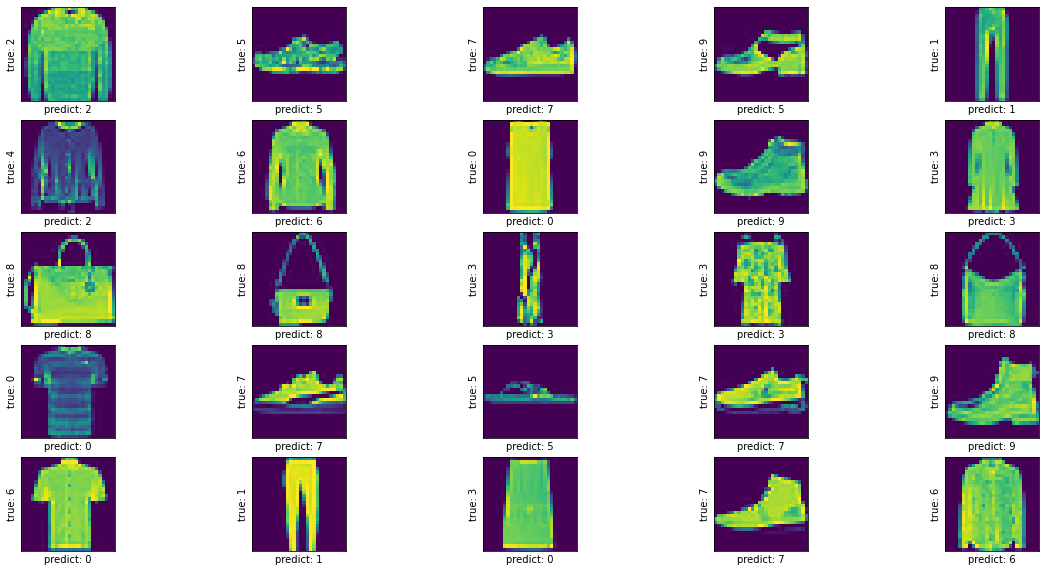

In [128]:
y_pred = model.predict(x_test)
plt.figure(figsize=(20,10))
for i in range(20,45,1):
  plt.subplot(5,5,i+1-20)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x[i])
  plt.xlabel("predict: "+str(np.argmax(y_pred[i])))
  plt.ylabel("true: "+str(np.argmax(y_test[i])))
plt.show()

(1, 784)
8


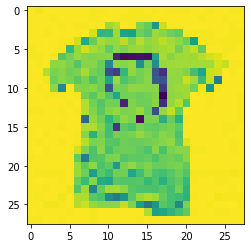

In [129]:
url='/content/12.jpg'
img=load_img(url,target_size=(28,28),color_mode="grayscale")
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,784)
img=img/255.0
print(img.shape)
print(np.argmax(model.predict(img)))

# **Cifar10**

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential 
from keras.utils import np_utils
from keras.layers import Dense,Activation,Dropout,Flatten
from tensorflow.keras.optimizers import SGD,Adam
from tensorflow.keras.utils import load_img,img_to_array
from tensorflow.keras.models import load_model
from keras.backend import categorical_crossentropy
import os



In [ ]:
from keras.datasets import cifar10
(x_train,y_train),(x_test,y_test)=cifar10.load_data()
x=x_test
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

170508288/170498071 [==============================] - 2s 0us/step


In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [ ]:
x_train=x_train/255.0
x_test=x_test/255.0
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

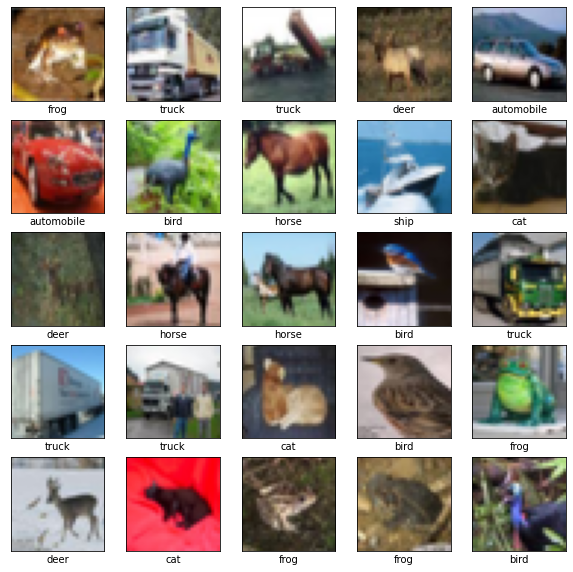

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x_train[i])
  plt.xlabel(classes[np.argmax(y_train[i])])
plt.show()

In [ ]:
model = Sequential()
model.add(Flatten(input_shape=(32,32,3)))
model.add(Dense(512,activation='relu'))
model.add(Dense(784,activation='relu'))
model.add(Dense(10,activation='Softmax'))
model.summary()
opt = Adam(learning_rate=0.0001)
model.compile(loss='categorical_crossentropy',optimizer=opt, metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 3072)              0         
                                                                 
 dense_6 (Dense)             (None, 512)               1573376   
                                                                 
 dense_7 (Dense)             (None, 784)               402192    
                                                                 
 dense_8 (Dense)             (None, 10)                7850      
                                                                 
Total params: 1,983,418
Trainable params: 1,983,418
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(x_train,y_train,batch_size=128,epochs=50,verbose=1,validation_data=(x_test,y_test))

Epoch 1/50
391/391 [==============================] - 13s 33ms/step - loss: 1.8527 - accuracy: 0.3410 - val_loss: 1.6808 - val_accuracy: 0.4173
Epoch 2/50
391/391 [==============================] - 13s 32ms/step - loss: 1.6522 - accuracy: 0.4152 - val_loss: 1.5955 - val_accuracy: 0.4372
Epoch 3/50
391/391 [==============================] - 13s 33ms/step - loss: 1.5605 - accuracy: 0.4485 - val_loss: 1.5526 - val_accuracy: 0.4458
Epoch 4/50
391/391 [==============================] - 13s 32ms/step - loss: 1.5024 - accuracy: 0.4696 - val_loss: 1.4858 - val_accuracy: 0.4726
Epoch 5/50
391/391 [==============================] - 13s 32ms/step - loss: 1.4630 - accuracy: 0.4838 - val_loss: 1.4765 - val_accuracy: 0.4783
Epoch 6/50
391/391 [==============================] - 13s 34ms/step - loss: 1.4160 - accuracy: 0.5021 - val_loss: 1.4731 - val_accuracy: 0.4699
Epoch 7/50
391/391 [==============================] - 13s 32ms/step - loss: 1.3860 - accuracy: 0.5108 - val_loss: 1.4173 - val_accuracy:

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/final_train/cifar10.h5')


In [ ]:
model = load_model('/content/drive/MyDrive/Colab Notebooks/final_train/cifar10.h5')

In [ ]:
score=model.evaluate(x_test,y_test,verbose=1)
print("test loss = ",score[0])
print("test accuracy = ",score[1])

313/313 [==============================] - 2s 7ms/step - loss: 1.4116 - accuracy: 0.5561
test loss =  1.411627173423767
test accuracy =  0.5561000108718872


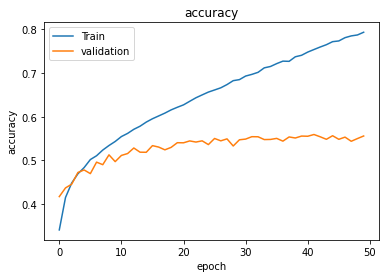

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','validation'],loc='upper left')
plt.show()

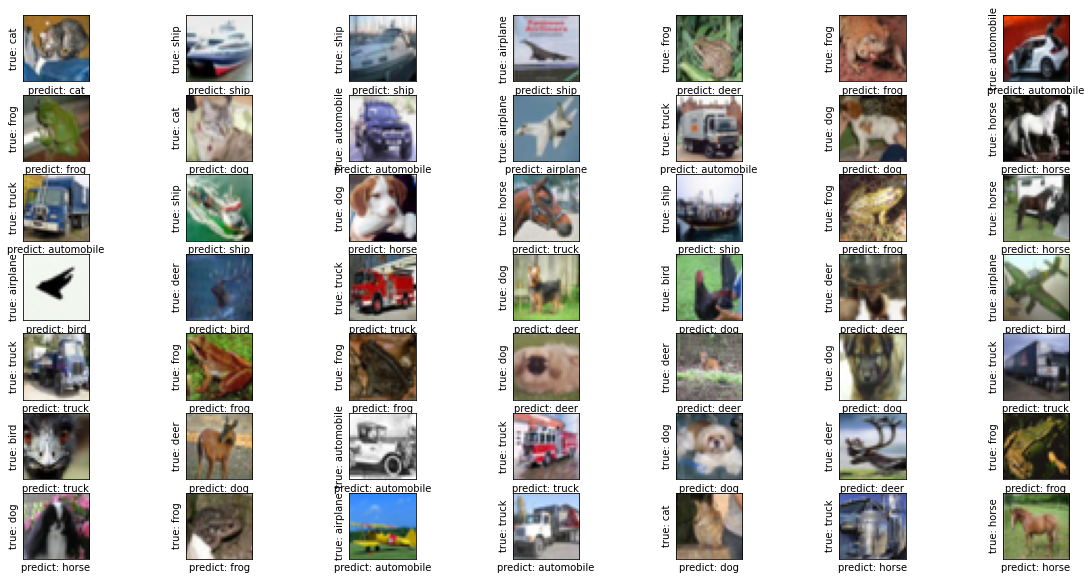

In [ ]:
y_pred = model.predict(x_test)
plt.figure(figsize=(20,10))
for i in range(49):
  plt.subplot(7,7,i+1)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x[i])
  plt.xlabel("predict: "+classes[np.argmax(y_pred[i])])
  plt.ylabel("true: "+classes[np.argmax(y_test[i])])
plt.show()

airplane


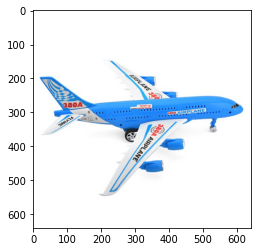

In [ ]:
url='/content/airplane.jpeg'
img=load_img(url,target_size=(32,32))
plt.imshow(load_img(url))
img=img_to_array(img)
img=img.reshape(1,32,32,3)
img=img.astype('float32')
img=img/255
print(classes[np.argmax(model.predict(img))])

In [ ]:
filenames=os.listdir("/content/drive/MyDrive/Colab Notebooks/dataset/Cat_dog_dataset/train")

categories=[]
for f_name in filenames:
    category=f_name.split('.')[0]
    if category=='dog':
        categories.append(1)
    else:
        categories.append(0)

df=pd.DataFrame({
    'filename':filenames,
    'category':categories
})

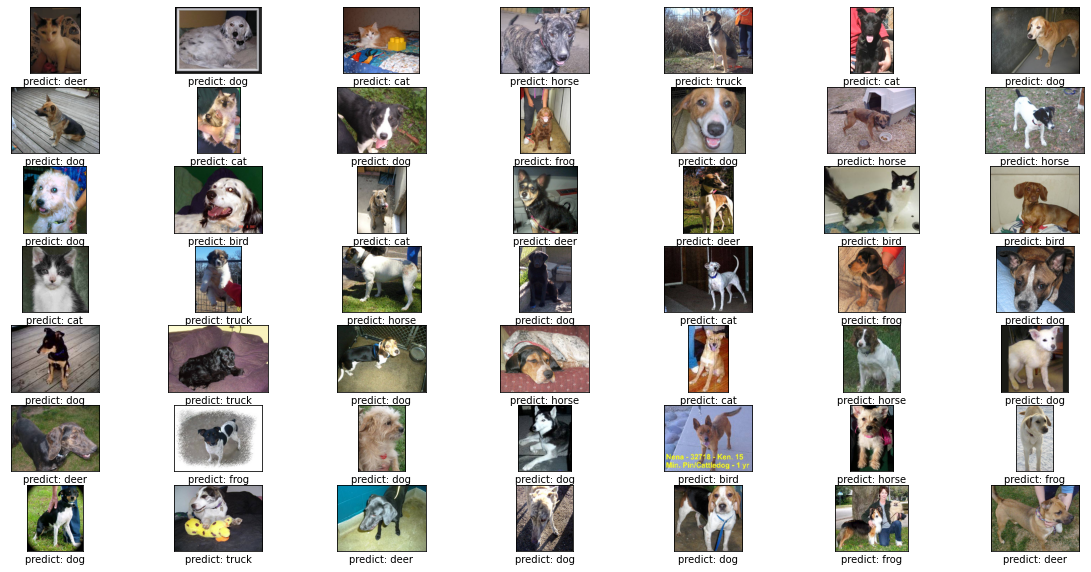

In [ ]:
url='/content/drive/MyDrive/Colab Notebooks/dataset/Cat_dog_dataset/train/'+df['filename']

plt.figure(figsize=(20,10))
for i in range(49):
  plt.subplot(7,7,i+1)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  img=load_img(url[i],target_size=(32,32))
  img=img_to_array(img)
  img=img.reshape(1,32,32,3)
  img=img.astype('float32')
  img=img/255
  img_pred = model.predict(img)
  plt.imshow(load_img(url[i]))
  plt.xlabel("predict: "+classes[np.argmax(img_pred)])
plt.show()

# **Cifar100**

In [130]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential 
from keras.utils import np_utils
from keras.layers import Dense,Activation,Dropout,Flatten
from tensorflow.keras.optimizers import SGD,Adam
from tensorflow.keras.utils import load_img,img_to_array
from tensorflow.keras.models import load_model
from keras.backend import categorical_crossentropy
import os



In [131]:
from keras.datasets import cifar100
(x_train,y_train),(x_test,y_test)=cifar100.load_data()
x=x_test
classes = [
    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle',
    'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel',
    'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock',
    'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur',
    'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster',
    'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion',
    'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse',
    'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear',
    'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine',
    'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose',
    'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake',
    'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table',
    'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout',
    'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman',
    'worm'
]

In [132]:
x_train=x_train/255.0
x_test=x_test/255.0
y_train=to_categorical(y_train,num_classes=100)
y_test=to_categorical(y_test,num_classes=100)

In [133]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 100)
(10000, 32, 32, 3)
(10000, 100)


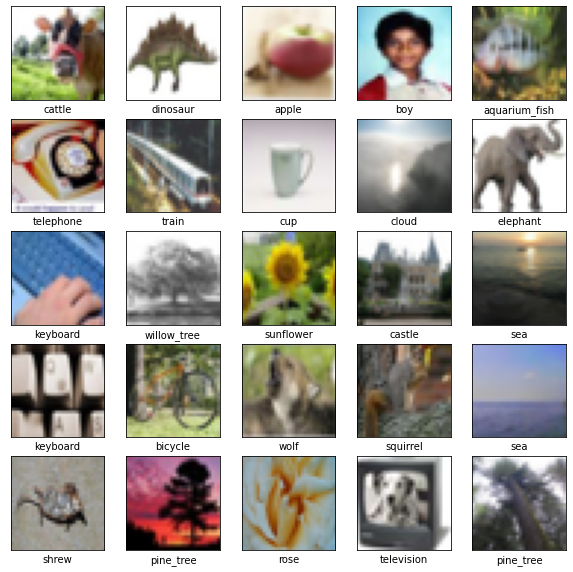

In [134]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x_train[i])
  plt.xlabel(classes[np.argmax(y_train[i])])
plt.show()

In [135]:
model = Sequential()
model.add(Flatten(input_shape=(32,32,3)))
model.add(Dense(784,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(784,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(100,activation='Softmax'))
model.summary()
#opt = SGD(learning_rate=0.001,momentum=0.9)
opt = Adam(learning_rate=0.0001)
model.compile(loss='categorical_crossentropy',optimizer=opt, metrics=['accuracy'])

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 3072)              0         
                                                                 
 dense_18 (Dense)            (None, 784)               2409232   
                                                                 
 dropout_2 (Dropout)         (None, 784)               0         
                                                                 
 dense_19 (Dense)            (None, 784)               615440    
                                                                 
 dropout_3 (Dropout)         (None, 784)               0         
                                                                 
 dense_20 (Dense)            (None, 100)               78500     
                                                                 
Total params: 3,103,172
Trainable params: 3,103,172
No

In [136]:
history = model.fit(x_train,y_train,batch_size=128,epochs=100,verbose=1,validation_data=(x_test,y_test))

Epoch 1/100
391/391 [==============================] - 22s 55ms/step - loss: 4.2628 - accuracy: 0.0583 - val_loss: 3.9567 - val_accuracy: 0.1025
Epoch 2/100
391/391 [==============================] - 22s 56ms/step - loss: 3.8946 - accuracy: 0.1111 - val_loss: 3.7490 - val_accuracy: 0.1362
Epoch 3/100
391/391 [==============================] - 25s 64ms/step - loss: 3.7310 - accuracy: 0.1366 - val_loss: 3.6421 - val_accuracy: 0.1581
Epoch 4/100
391/391 [==============================] - 22s 55ms/step - loss: 3.6283 - accuracy: 0.1570 - val_loss: 3.5672 - val_accuracy: 0.1736
Epoch 5/100
391/391 [==============================] - 22s 55ms/step - loss: 3.5456 - accuracy: 0.1706 - val_loss: 3.5111 - val_accuracy: 0.1823
Epoch 6/100
391/391 [==============================] - 21s 55ms/step - loss: 3.4742 - accuracy: 0.1847 - val_loss: 3.4439 - val_accuracy: 0.1985
Epoch 7/100
391/391 [==============================] - 22s 56ms/step - loss: 3.4124 - accuracy: 0.1957 - val_loss: 3.4014 - val_ac

In [140]:
model.save('/content/drive/MyDrive/Colab Notebooks/final_train/cifar100.h5')


In [ ]:
model = load_model('/content/drive/MyDrive/Colab Notebooks/final_train/cifar100.h5')

In [137]:
score=model.evaluate(x_test,y_test,verbose=1)
print("test loss = ",score[0])
print("test accuracy = ",score[1])

313/313 [==============================] - 5s 15ms/step - loss: 3.2565 - accuracy: 0.3095
test loss =  3.2564899921417236
test accuracy =  0.3095000088214874


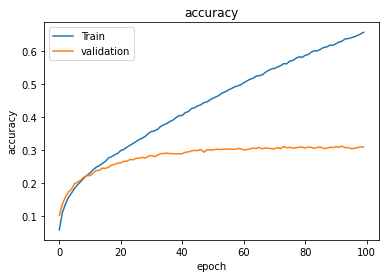

In [138]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','validation'],loc='upper left')
plt.show()

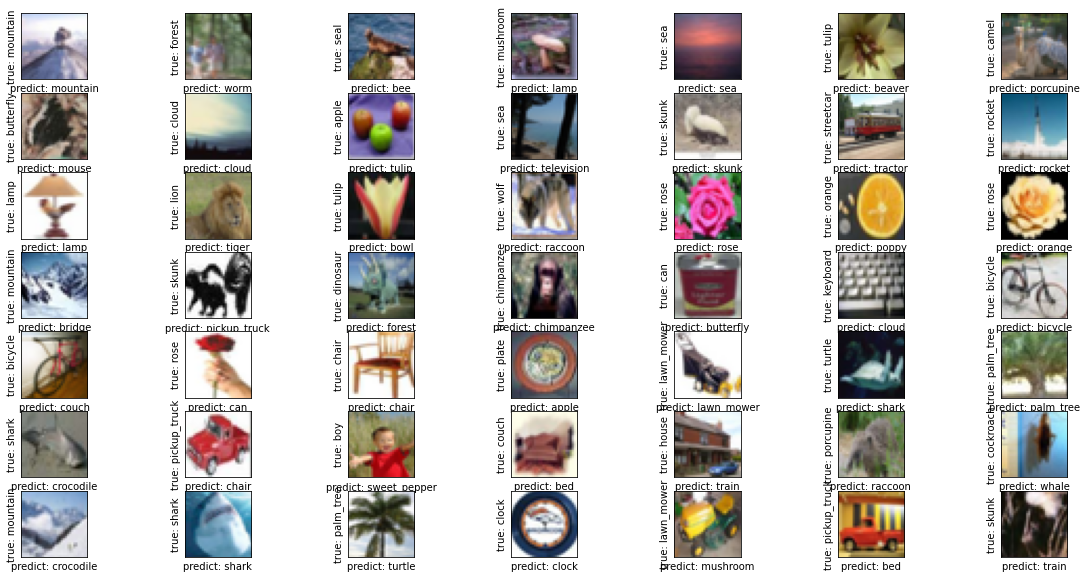

In [139]:
y_pred = model.predict(x_test)
plt.figure(figsize=(20,10))
for i in range(49):
  plt.subplot(7,7,i+1)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x[i])
  plt.xlabel("predict: "+classes[np.argmax(y_pred[i])])
  plt.ylabel("true: "+classes[np.argmax(y_test[i])])
plt.show()

# **FaceID**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense , Activation, Dropout,Flatten
from tensorflow.keras.utils import to_categorical,load_img,img_to_array
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD, Adam
from keras.backend import categorical_crossentropy


In [ ]:
train_url = '/content/drive/MyDrive/Colab Notebooks/dataset/Face_ID_dataset/Train'
data_generator = ImageDataGenerator(rescale=1./255,validation_split=0.1)
train_dataset=data_generator.flow_from_directory(train_url,
                                     target_size=(150,150),
                                     batch_size=10,
                                     class_mode='categorical',
                                     subset="training",)
validation_dataset=data_generator.flow_from_directory(train_url,
                                              target_size=(150,150),
                                              batch_size=10,
                                              class_mode='categorical',
                                              subset="validation",)

Found 159 images belonging to 2 classes.
Found 17 images belonging to 2 classes.


In [ ]:
validation_dataset.class_indices

{'Me': 0, 'Not_Me': 1}

In [ ]:
model = Sequential()
model.add(Flatten(input_shape=(150,150,3)))
model.add(Dense(512,activation='relu'))
model.add(Dense(784,activation='relu'))
model.add(Dense(2,activation='Softmax'))
model.summary()
opt = Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 67500)             0         
                                                                 
 dense (Dense)               (None, 512)               34560512  
                                                                 
 dense_1 (Dense)             (None, 784)               402192    
                                                                 
 dense_2 (Dense)             (None, 2)                 1570      
                                                                 
Total params: 34,964,274
Trainable params: 34,964,274
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(train_dataset,batch_size=10,epochs=20,verbose=1,validation_data=validation_dataset)

Epoch 1/20
16/16 [==============================] - 37s 2s/step - loss: 33.3692 - accuracy: 0.5849 - val_loss: 7.9103 - val_accuracy: 0.6471
Epoch 2/20
16/16 [==============================] - 8s 494ms/step - loss: 4.1187 - accuracy: 0.7547 - val_loss: 2.3561e-06 - val_accuracy: 1.0000
Epoch 3/20
16/16 [==============================] - 8s 492ms/step - loss: 1.5893 - accuracy: 0.8868 - val_loss: 1.6479e-06 - val_accuracy: 1.0000
Epoch 4/20
16/16 [==============================] - 8s 496ms/step - loss: 0.6513 - accuracy: 0.9434 - val_loss: 0.0018 - val_accuracy: 1.0000
Epoch 5/20
16/16 [==============================] - 8s 488ms/step - loss: 0.3908 - accuracy: 0.9623 - val_loss: 1.4930 - val_accuracy: 0.7647
Epoch 6/20
16/16 [==============================] - 8s 488ms/step - loss: 0.5580 - accuracy: 0.9434 - val_loss: 2.1037e-08 - val_accuracy: 1.0000
Epoch 7/20
16/16 [==============================] - 8s 489ms/step - loss: 0.2590 - accuracy: 0.9686 - val_loss: 0.0796 - val_accuracy: 0.

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/final_train/face_id.h5')

In [ ]:
model = load_model('/content/drive/MyDrive/Colab Notebooks/final_train/face_id.h5')

In [ ]:
score=model.evaluate(validation_dataset,verbose=1)
print("test loss = ",score[0])
print("test accuracy = ",score[1])

2/2 [==============================] - 1s 142ms/step - loss: 3.2143e-05 - accuracy: 1.0000
test loss =  3.214266325812787e-05
test accuracy =  1.0


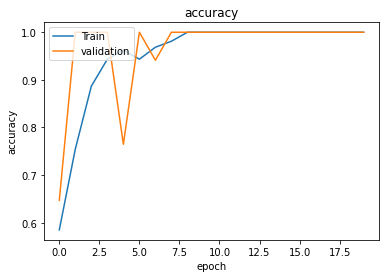

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','validation'],loc='upper left')
plt.show()

0


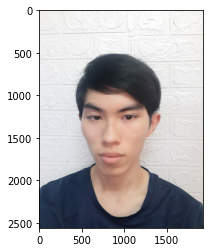

In [ ]:
url='/content/drive/MyDrive/Colab Notebooks/dataset/Face_ID_dataset/Test_dataset/Me/z3408549173733_ae392d66a8eebd1eeeea91f8f463b7ef.jpg'
img=load_img(url,target_size=(150,150))
plt.imshow(load_img(url))
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img/255.0
print(np.argmax(model.predict(img)))

In [ ]:
test_url= '/content/drive/MyDrive/Colab Notebooks/dataset/Face_ID_dataset/Test_dataset/'
test_generator = ImageDataGenerator(rescale=1./255)
test_dataset=test_generator.flow_from_directory(test_url,
                                     target_size=(150,150),
                                     batch_size=10,
                                     class_mode='categorical',
                                     shuffle=False,)

Found 25 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """


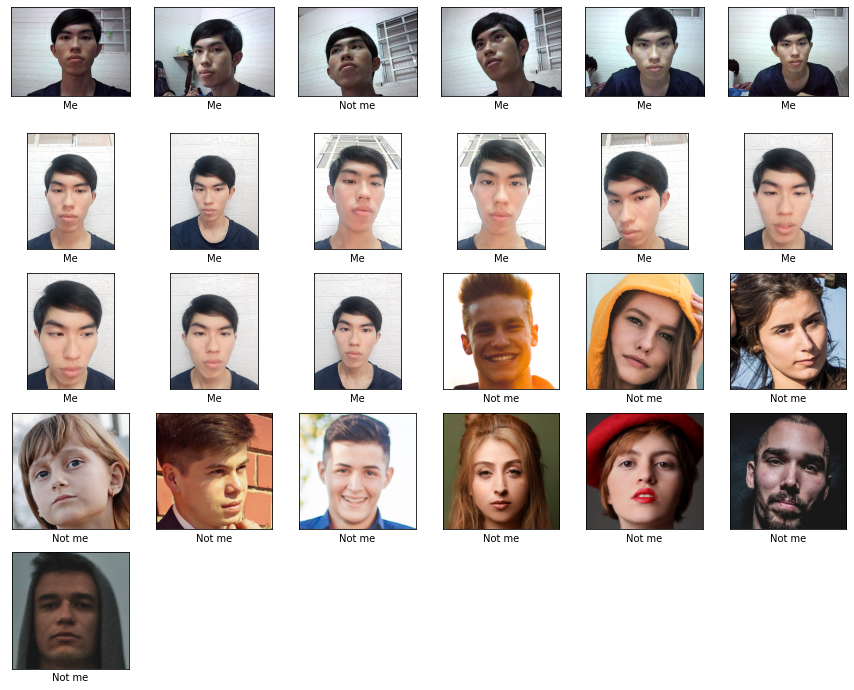

In [ ]:
results={
    0:'Me',
    1:'Not me'
}
pred = model.predict_generator(test_dataset)
plt.figure(figsize=(15,15))
for i in range(pred.shape[0]):
  plt.subplot(6,6,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(load_img(test_dataset.filepaths[i]))
  plt.xlabel(results[np.argmax(pred[i])])
plt.show()